In [2]:
# Import the required libraries and dependencies
import prophet
import pandas as pd
import datetime as dt
from prophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Read the data from the csv file into a Pandas Dataframe
# data_df = pd.read_csv("") - Completed
# to display display(data_df.head()) - Completed

CSIQ_df = pd.read_csv('./data/CSIQ.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
DQ_df = pd.read_csv('./data/DQ.csv'     , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
ENPH_df = pd.read_csv('./data/ENPH.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
FSLR_df = pd.read_csv('./data/FSLR.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
JKS_df = pd.read_csv('./data/JKS.csv'   , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
SEDG_df = pd.read_csv('./data/SEDG.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)
SPWR_df = pd.read_csv('./data/SPWR.csv' , 
    infer_datetime_format = True        ,
    parse_dates =           True        ,
    index_col =             'Date'
)


C:\Users\lovel\AppData\Local\Temp\ipykernel_13856\1875043608.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  CSIQ_df = pd.read_csv('./data/CSIQ.csv' ,
C:\Users\lovel\AppData\Local\Temp\ipykernel_13856\1875043608.py:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  DQ_df = pd.read_csv('./data/DQ.csv'     ,
C:\Users\lovel\AppData\Local\Temp\ipykernel_13856\1875043608.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org

In [4]:
# Displaying DataFrames 
# Verified DataFrames have been imported.
display(CSIQ_df.head())
display(DQ_df.head())
display(ENPH_df.head())
display(FSLR_df.head())
display(JKS_df.head())
display(SEDG_df.head())
display(SPWR_df.head())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.360001,22.540001,22.040001,22.520000,22.520000,643300
2020-01-03,22.190001,22.440001,21.590000,21.799999,21.799999,809600
2020-01-06,21.309999,22.330000,21.100000,22.320000,22.320000,938000
2020-01-07,22.290001,22.600000,22.219999,22.360001,22.360001,596900
2020-01-08,22.370001,22.709999,22.110001,22.570000,22.570000,709800


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,10.240,11.032,10.240,10.996,10.996,1278000
2020-01-03,10.956,11.102,10.810,10.890,10.890,879500
2020-01-06,10.838,10.840,10.502,10.770,10.770,621000
2020-01-07,10.698,10.834,10.560,10.672,10.672,475500
2020-01-08,10.682,10.932,10.682,10.876,10.876,773500


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,26.370001,29.350000,26.040001,29.340000,29.340000,7775400
2020-01-03,28.790001,29.730000,28.379999,29.290001,29.290001,4811000
2020-01-06,29.049999,29.660000,27.830000,29.660000,29.660000,4628800
2020-01-07,29.820000,30.200001,28.660000,29.990000,29.990000,5363100
2020-01-08,29.680000,31.500000,29.440001,31.000000,31.000000,5446100


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,56.400002,57.259998,55.959999,57.240002,57.240002,1053800
2020-01-03,57.110001,57.660000,56.709999,57.020000,57.020000,943700
2020-01-06,56.009998,56.419998,54.779999,55.830002,55.830002,1535100
2020-01-07,55.759998,57.310001,55.759998,56.669998,56.669998,974200
2020-01-08,56.860001,57.110001,56.160000,56.700001,56.700001,725700


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,22.790001,23.850000,22.590000,23.84,22.810047,1130300
2020-01-03,23.170000,23.650000,22.480000,22.59,21.614050,1319300
2020-01-06,21.969999,22.570000,21.799999,22.49,21.518370,997800
2020-01-07,22.650000,23.000000,22.559999,22.74,21.757568,592700
2020-01-08,22.480000,22.540001,21.959999,22.23,21.269602,856900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,97.000000,101.879997,96.750000,101.809998,101.809998,2154800
2020-01-03,100.839996,103.599998,100.019997,102.379997,102.379997,1016500
2020-01-06,101.370003,101.879997,98.635002,99.629997,99.629997,970800
2020-01-07,100.000000,102.029999,97.699997,101.790001,101.790001,834900
2020-01-08,101.190002,105.680000,101.190002,104.160004,104.160004,1041300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.173543,5.173543,5.029470,5.127701,5.127701,2764786
2020-01-03,5.062213,5.094957,4.813360,4.826457,4.826457,7053366
2020-01-06,4.734774,4.937787,4.643091,4.891945,4.891945,5552325
2020-01-07,4.905043,5.094957,4.833006,5.003274,5.003274,3223344
2020-01-08,4.963982,5.101506,4.885396,5.029470,5.029470,4496252


In [5]:
# create a new Data frame with just the date and close columns
# new variable_df = old_df[{"Date" , "Close"}]
# Coding comes per our group conversation on THU 4/11/24

csiq_df = CSIQ_df[["Close"]]
dq_df = DQ_df[["Close"]]
enph_df = ENPH_df[["Close"]]
fslr_df = FSLR_df[["Close"]]
jks_df = JKS_df[["Close"]]
sedg_df = SEDG_df[["Close"]]
spwr_df = SPWR_df[["Close"]]



In [6]:
# Rename the close column in this cleaning step
# new variable_df = new variable_df.rename(columns = {"Close" : "STOCK SYMBOL"})
# Coding comes per our group conversation on THU 4/11/24

csiq_df = csiq_df.rename(columns = {"Close" : "CSIQ_Close"})
dq_df = dq_df.rename(columns = {"Close" : "DQ_Close"})
enph_df = enph_df.rename(columns = {"Close" : "ENPH_Close"})
fslr_df = fslr_df.rename(columns = {"Close" : "FSLR_Close"})
jks_df = jks_df.rename(columns = {"Close" : "JKS_Close"})
sedg_df = sedg_df.rename(columns = {"Close" : "SEDG_Close"})
spwr_df = spwr_df.rename(columns = {"Close" : "SPWR_Close"})

In [7]:
# Displaying to ensure columns have the correct title.
# display(csiq_df.head())
# display(dq_df.head())
# display(enph_df.head())
# display(fslr_df.head())
# display(jks_df.head())
# display(sedg_df.head())
# display(spwr_df.head())

Plotting the general trends for years 2020 to 2024

In [8]:
# Plot the DataFrame
# Lesson 07 - Data Visualizations

CSIQ - Canadian Solar Industry 

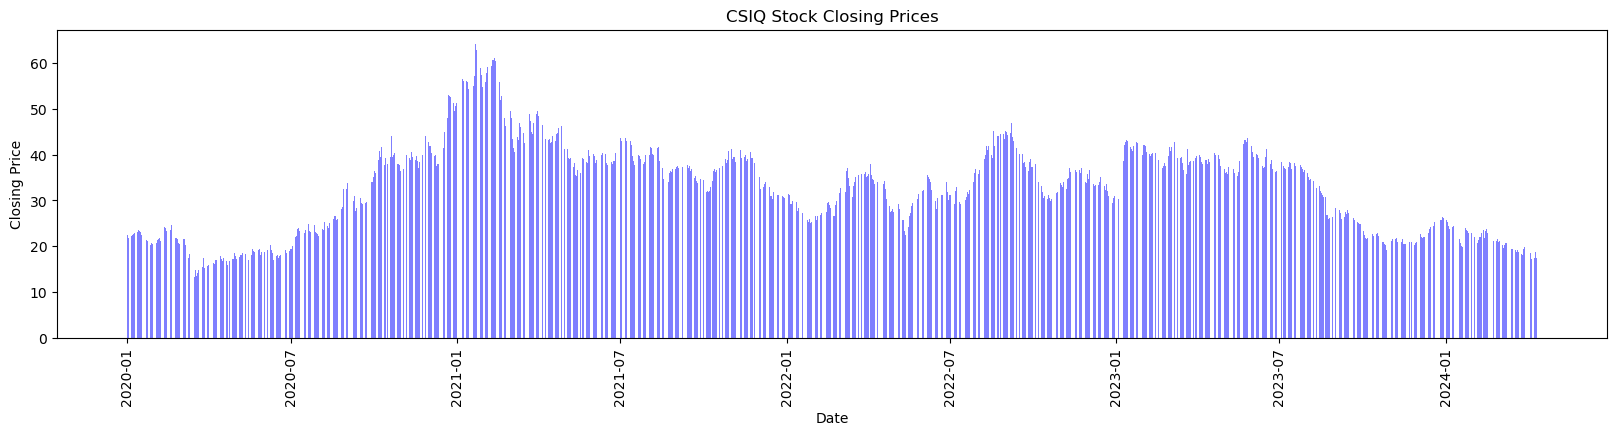

In [9]:
csiq_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


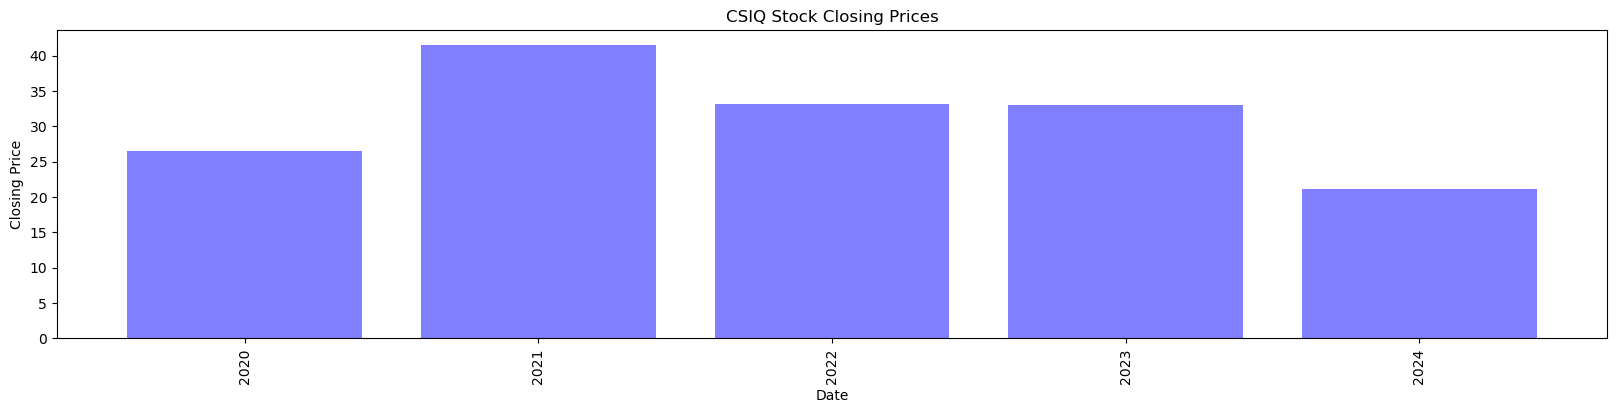

In [32]:
csiq_df['Date'] = pd.to_datetime(csiq_df['Date'])
csiq_df['Year'] = csiq_df['Date'].dt.year
average_price_by_year = csiq_df.groupby('Year')['CSIQ_Close'].mean()
tick_locations = range(len(average_price_by_year))
x_labels = [str(year) for year in average_price_by_year.index]
plt.figure(figsize=(20, 4))
plt.bar(x_labels, average_price_by_year, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

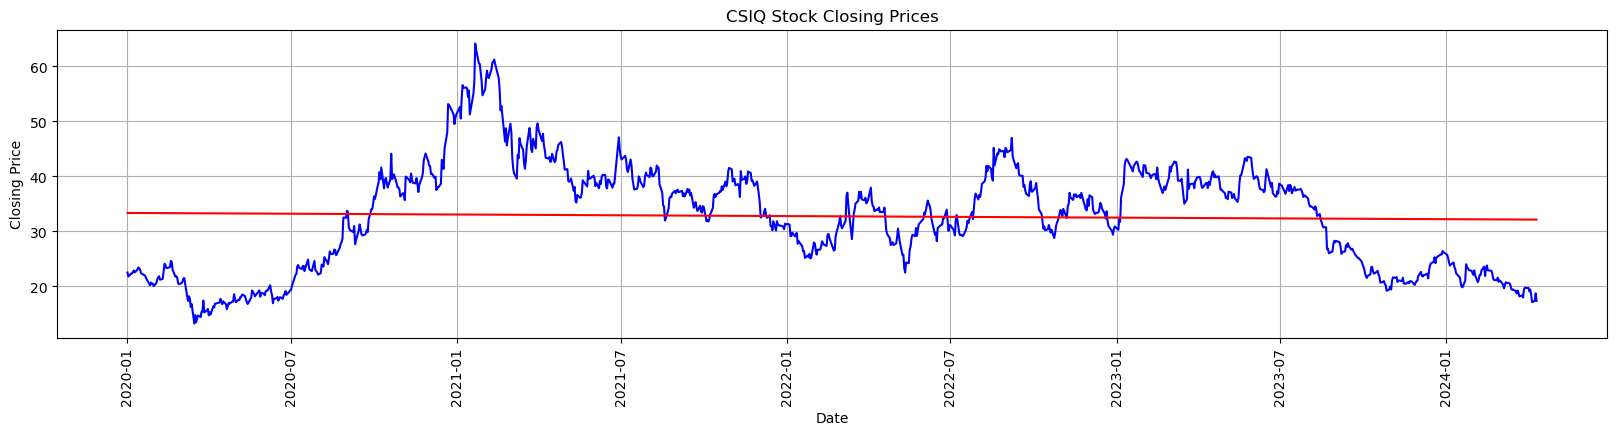

In [31]:
# Use Prophet to see daily/yearly trends
# Example 


csiq_df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(20, 4))
plt.plot(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', linestyle='-')

X = np.arange(len(csiq_df)).reshape(-1, 1)  
y = csiq_df['CSIQ_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.plot(csiq_df['Date'], trend, label='Linear Trend', color='red')
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [29]:
#Lesson 08 - NOT NEEDED
# prophet_df = csiq_df[['Date', 'CSIQ_Close']].rename(columns={'Date': 'ds', 'CSIQ_Close': 'y'})

# # Instantiate and fit the Prophet model
# prophet_model = Prophet()
# prophet_model.fit(prophet_df)

# # # Make future predictions with Prophet
# # future = prophet_model.make_future_dataframe(periods=365)  
# # forecast = prophet_model.predict(future)

# # Plot the forecast
# plt.figure(figsize=(20, 4))
# plt.plot(csiq_df['Date'], csiq_df["CSIQ_Close"], color='b', linestyle='-', label='Actual')
# # plt.plot(forecast['ds'], forecast['yhat'], color='red', linestyle='-', label='Forecast')
# # plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
# plt.xticks(rotation="vertical")
# plt.title('CSIQ Stock Closing Prices Forecast')
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.legend()
# plt.grid(True)
# plt.show()

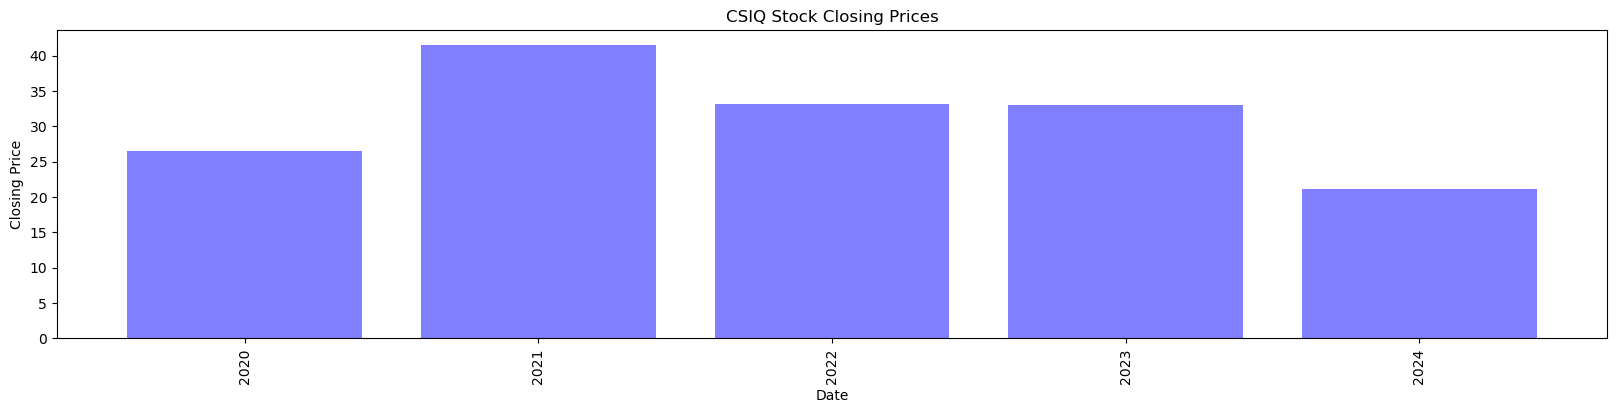

In [12]:
# Converting the Date column from daily to yearly.
# Reprinting figure to show yearly closing prices.

csiq_df['Date'] = pd.to_datetime(csiq_df['Date'])
csiq_df['Year'] = csiq_df['Date'].dt.year
average_price_by_year = csiq_df.groupby('Year')['CSIQ_Close'].mean()
tick_locations = range(len(average_price_by_year))
x_labels = [str(year) for year in average_price_by_year.index]
plt.figure(figsize=(20, 4))
plt.bar(x_labels, average_price_by_year, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title('CSIQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


In [13]:
# #Summary Statistics
# Lesson 08 - Use the pct change function to calculate returns

csiq_df['Year'] = csiq_df['Date'].dt.year
csiq_returns = csiq_df['CSIQ_Close'].pct_change()
csiq_df['Daily_Return'] = csiq_df['CSIQ_Close'].pct_change()
yearly_summary_statistics_csiq = csiq_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for CSIQ stock on a yearly basis:")
print(yearly_summary_statistics_csiq)



Summary statistics for CSIQ stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.004277  0.044777 -0.211905 -0.018642  0.001740  0.029783   
2021  252.0 -0.001277  0.037072 -0.094285 -0.025458 -0.003528  0.017485   
2022  251.0  0.000756  0.040350 -0.137515 -0.025465  0.000268  0.023799   
2023  250.0 -0.000184  0.030972 -0.129064 -0.017592 -0.003009  0.013523   
2024   69.0 -0.005291  0.037311 -0.074973 -0.031050 -0.009359  0.016745   

           max  
Year            
2020  0.135475  
2021  0.129344  
2022  0.151925  
2023  0.150307  
2024  0.142043  


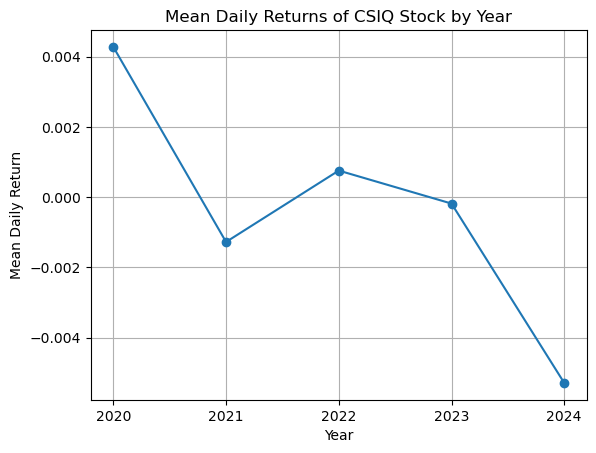

In [14]:
# # Visualizing and plotting the mean from the summary statistics
# *** Commented original code since Mean Daily Return is not necessary ***

yearly_summary_statistics_csiq['mean'].plot(marker='o', linestyle='-')
plt.title('Mean Daily Returns of CSIQ Stock by Year')
plt.xlabel('Year')
plt.ylabel('Mean Daily Return')
plt.xticks(yearly_summary_statistics_csiq.index.astype(int))
plt.grid(True)
plt.show()

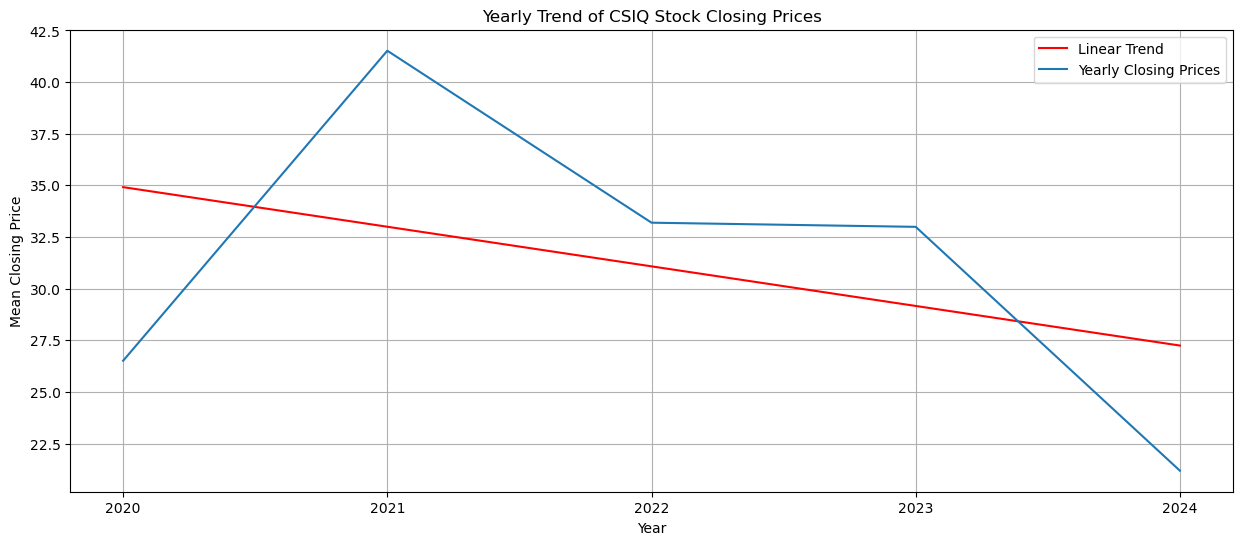

In [15]:
# Overall Yearly Trend in Stock prices from 2020 to 2024

csiq_yearly_data = csiq_df.groupby('Year').mean()

plt.figure(figsize=(15, 6))

# Linear regression for trend analysis
X = np.arange(len(csiq_yearly_data)).reshape(-1, 1)  
y = csiq_yearly_data['CSIQ_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(csiq_yearly_data.index, trend, label='Linear Trend', color='red')

# Original yearly closing prices
plt.plot(csiq_yearly_data.index, csiq_yearly_data['CSIQ_Close'], label='Yearly Closing Prices')

plt.title('Yearly Trend of CSIQ Stock Closing Prices')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(csiq_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# CSIQ_df['Close'].plot(figsize= [15, 7])

In [17]:
# CSIQ_df[['High', 'Low']].plot(figsize= [15, 7])

In [27]:
# combined_data = pd.read_csv('data/combined_data_index.csv')
# combined_data.head()

In [28]:
# combined_data.plot()

DQ - Daqo New Energy Corp

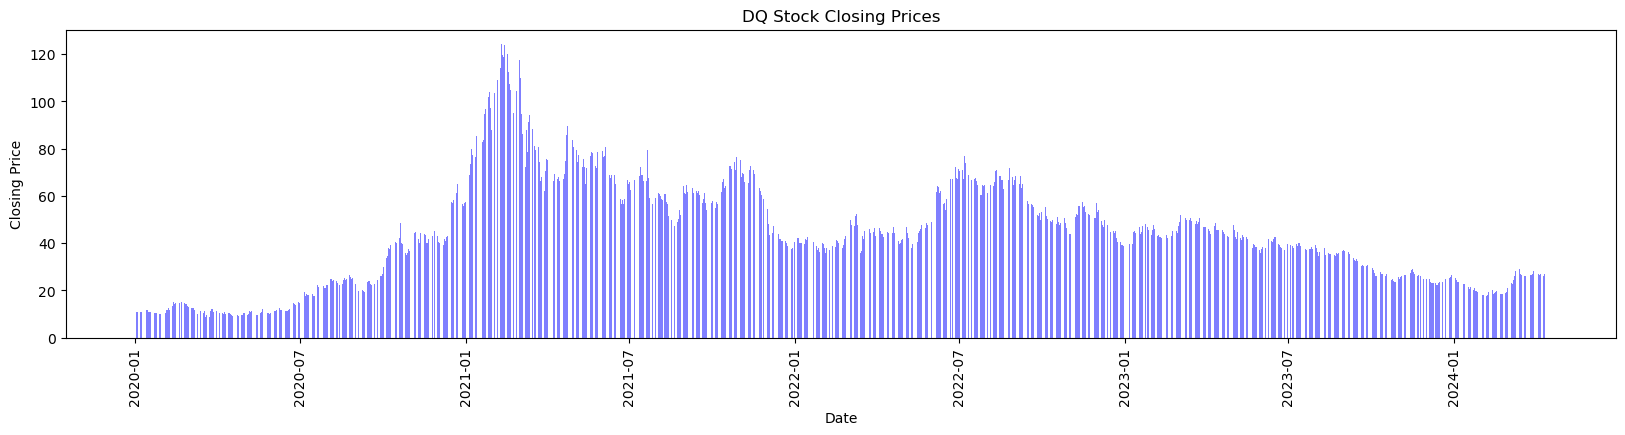

In [20]:
#**DQ Stock Closing Prices**
dq_df.reset_index(inplace=True)
plt.figure(figsize=(20, 4))
plt.bar(dq_df['Date'], dq_df["DQ_Close"], color='b', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.title('DQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

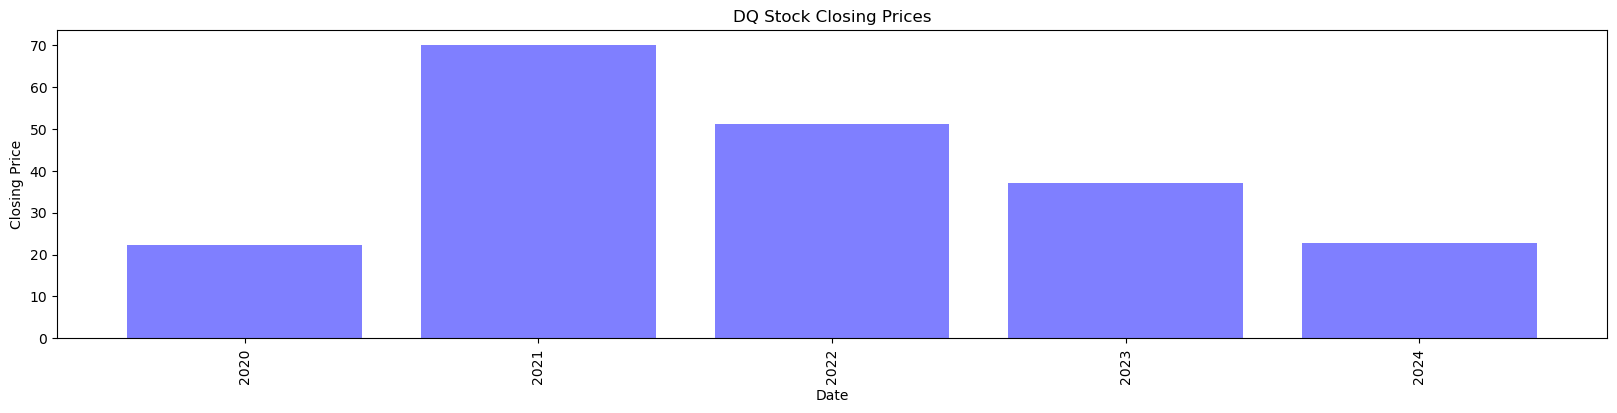

In [21]:
# Converting the Date column from daily to yearly.
# Reprinting figure to show yearly closing prices.

dq_df['Date'] = pd.to_datetime(dq_df['Date'])
dq_df['Year'] = dq_df['Date'].dt.year
average_price_by_year = dq_df.groupby('Year')['DQ_Close'].mean()
tick_locations = range(len(average_price_by_year))
x_labels = [str(year) for year in average_price_by_year.index]
plt.figure(figsize=(20, 4))
plt.bar(x_labels, average_price_by_year, color='b', alpha=0.5, align="center")
plt.xticks(rotation="vertical")
plt.title('DQ Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [22]:
# #Summary Statistics
# Lesson 08 - Use the pct change function to calculate returns
dq_df['Year'] = dq_df['Date'].dt.year
csiq_returns = dq_df['DQ_Close'].pct_change()
dq_df['Daily_Return'] = dq_df['DQ_Close'].pct_change()
yearly_summary_statistics_csiq = dq_df.groupby('Year')['Daily_Return'].describe()
print("Summary statistics for DQ stock on a yearly basis:")
print(yearly_summary_statistics_csiq)

Summary statistics for DQ stock on a yearly basis:
      count      mean       std       min       25%       50%       75%  \
Year                                                                      
2020  252.0  0.008477  0.062519 -0.226197 -0.025471  0.003648  0.038365   
2021  252.0  0.000443  0.061477 -0.147518 -0.037163 -0.006916  0.033059   
2022  251.0  0.001004  0.048999 -0.138369 -0.033291 -0.003680  0.024181   
2023  250.0 -0.001019  0.030878 -0.075498 -0.021330 -0.005599  0.018455   
2024   69.0  0.000136  0.035826 -0.076195 -0.022210 -0.002595  0.020134   

           max  
Year            
2020  0.279676  
2021  0.221266  
2022  0.171467  
2023  0.123927  
2024  0.084687  


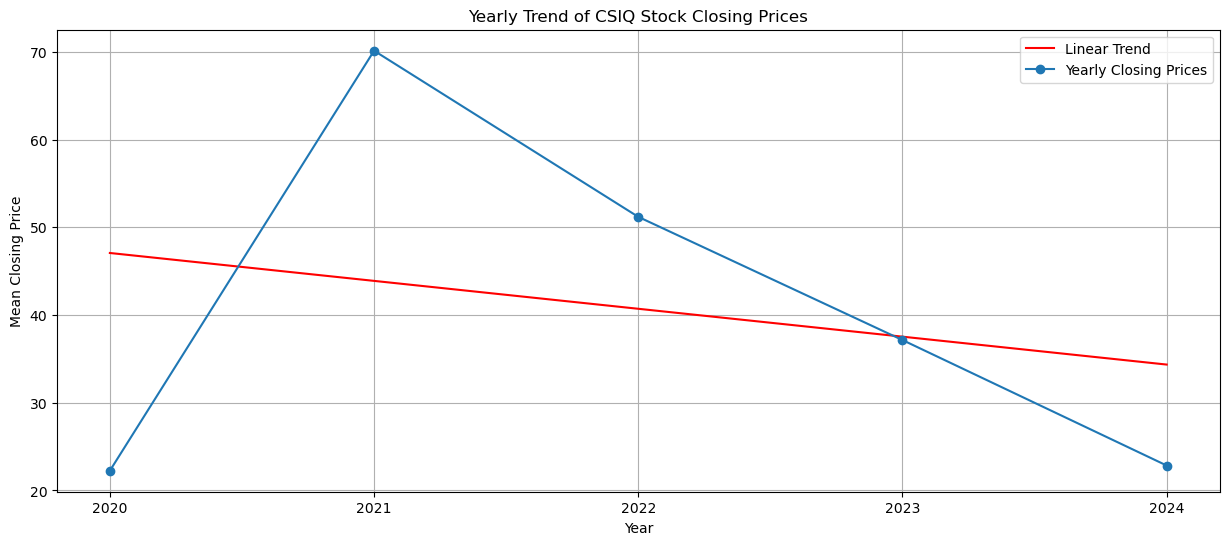

In [24]:
# Visualizing and plotting the mean from the summary statistics
dq_yearly_data = dq_df.groupby('Year').mean()
plt.figure(figsize=(15, 6))
X = np.arange(len(dq_yearly_data)).reshape(-1, 1)  
y = dq_yearly_data['DQ_Close'].values.reshape(-1, 1) 
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)
plt.plot(dq_yearly_data.index, trend, label='Linear Trend', color='red')
plt.plot(dq_yearly_data.index, dq_yearly_data['DQ_Close'], marker='o', linestyle='-', label='Yearly Closing Prices')
plt.title('Yearly Trend of CSIQ Stock Closing Prices')
plt.xlabel('Year')
plt.ylabel('Mean Closing Price')
plt.xticks(dq_yearly_data.index)  
plt.legend()
plt.grid(True)
plt.show()

ENPH - Enphase Energy Inc